In [ ]:
# Análise do tamanho da janela deslizante

In [1]:
from google.colab import drive
drive.mount('/content/drive')
import os
import pandas as pd
import numpy as np
import time

rootPath = "/content/drive/MyDrive/dataset/veremi"
t2Path = "/veremiWithT2"
csvt2Path = "/simulationscsv"
parsewindowsize = "/parsewindowsize"

Mounted at /content/drive


In [2]:
os.chdir(rootPath+t2Path+csvt2Path)
simulations = pd.Series(os.listdir()).sort_values().reset_index(drop=True)
simulations

0      veins_maat.uc1.14505201.180205_165350.csv
1      veins_maat.uc1.14505202.180205_165350.csv
2      veins_maat.uc1.14505203.180205_165350.csv
3      veins_maat.uc1.14505204.180205_165350.csv
4      veins_maat.uc1.14505205.180205_165350.csv
                         ...                    
220    veins_maat.uc1.14506016.180205_200240.csv
221    veins_maat.uc1.14506018.180205_200359.csv
222    veins_maat.uc1.14506020.180205_200359.csv
223    veins_maat.uc1.14506021.180205_200359.csv
224    veins_maat.uc1.14506023.180205_200518.csv
Length: 225, dtype: object

In [ ]:
# scenario1
start_time = time.time()
os.chdir(rootPath+t2Path+csvt2Path)
simulations = pd.Series(os.listdir()).sort_values().reset_index(drop=True)
sims = len(simulations[0:45])
dataset = []
for idx, item in enumerate(simulations[0:45]):
  # if idx <= 1:
    data = pd.read_csv(item, index_col=0)
    data = data[['receiver', 'sender', 'attackerType']]
    a = pd.Series(data['receiver'].unique().astype(int)).sort_values().reset_index(drop=True)
    b = pd.Series(data['sender'].unique().astype(int)).sort_values().reset_index(drop=True)
    vehicles = pd.concat([a, b], ignore_index=True).unique()
    size = len(vehicles)
    newdata = []

    for i, r in enumerate(vehicles):
      # if i <= 0:
        for s in data['sender'].loc[data['receiver'] == r].astype(int).unique():
          # print(r, s)
          print('\r',
                'simulation '+str(idx+1)+' of '+str(sims),
                ', vehicle '+str(i+1)+' of '+str(size),
                " in {:.2f}".format(time.time() - start_time)+' sec',
                sep='', end='', flush=True)
          l = len(data.loc[(data['receiver'] == r) & (data['sender'] == s)])
          newdata = np.append(newdata, [l, data['attackerType'].loc[(data['receiver'] == r) & (data['sender'] == s)].unique()[0]])
          dataset.append(newdata)
          newdata = []


df = pd.DataFrame(dataset)
df.columns = ['messages', 'attackerType']
# display(df)
os.chdir(rootPath+t2Path+parsewindowsize)
print('\rSaving', sep='', end='', flush=True)
df.to_csv('numbermsg1.csv')
print('\rDone in ', "{:.2f}".format(time.time() - start_time)+' sec', sep='', end='', flush=True)

Done in 6488.17 sec

In [ ]:
os.chdir(rootPath+t2Path+parsewindowsize)
os.listdir()
# df = pd.read_csv('numbermsg1.csv', index_col=0)

1 13089
2 12001
3 9745
4 7304
5 5555
6 4910
7 4288
8 4155
9 3794
10 3928
11 3877
12 3610
13 3615
14 3158
15 2704


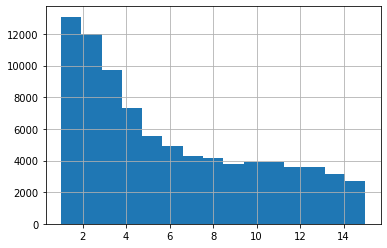

In [ ]:
df['messages'].loc[df['attackerType'] != 0].loc[df['messages'] < 16].hist(bins=15)
for i in range(1, 16):
  print(i, len(df['messages'].loc[df['attackerType'] != 0].loc[df['messages'] == i]))

In [ ]:
# scenario1 - 5
# sim / rcv / sender / messages / attackerType
start_time = time.time()
os.chdir(rootPath+t2Path+parsewindowsize)
concluded = pd.Series(os.listdir()).sort_values().reset_index(drop=True)
startsim = concluded.last_valid_index() + 1
os.chdir(rootPath+t2Path+csvt2Path)
simulations = pd.Series(os.listdir()).sort_values().reset_index(drop=True)
totalsim = len(simulations)
for idx, item in enumerate(simulations[startsim:totalsim]):
  # if idx <= 0:
    os.chdir(rootPath+t2Path+csvt2Path)
    data = pd.read_csv(item, index_col=0)
    data = data[['receiver', 'sender', 'attackerType']]
    a = pd.Series(data['receiver'].unique().astype(int)).sort_values().reset_index(drop=True)
    b = pd.Series(data['sender'].unique().astype(int)).sort_values().reset_index(drop=True)
    vehicles = pd.concat([a, b], ignore_index=True).unique()
    size = len(vehicles)
    dataset = []

    for i, r in enumerate(vehicles):
      # if i <= 0:
        for s in data['sender'].loc[data['receiver'] == r].astype(int).unique():
          # print(r, s)
          print('\r',
                'simulation '+str(startsim+idx+1)+' of '+str(totalsim),
                ', vehicle '+str(i+1)+' of '+str(size),
                " in {:.2f}".format(time.time() - start_time)+' sec',
                sep='', end='', flush=True)
          l = len(data.loc[(data['receiver'] == r) & (data['sender'] == s)])
          newdata = np.append(newdata, [idx+startsim, r, s, l, data['attackerType'].loc[(data['receiver'] == r) & (data['sender'] == s)].unique()[0]])
          dataset.append(newdata)
          newdata = []

    df = pd.DataFrame(dataset)
    df.columns = ['sim', 'rcv', 'sender', 'messages', 'attackerType']
    # display(df)
    os.chdir(rootPath+t2Path+parsewindowsize)
    print('\rSaving', sep='', end='', flush=True)
    df.to_csv('numbermsg'+f"{idx+startsim:03}"+'.csv')
print('\rDone in ', "{:.2f}".format(time.time() - start_time)+' sec', sep='', end='', flush=True)

Done in 33022.34 sec

In [37]:
os.chdir(rootPath+t2Path+parsewindowsize)
concluded = []
concluded = pd.Series(os.listdir()).sort_values().reset_index(drop=True)
allmsg = []
dflist = []
for idx, item in enumerate(concluded):
  print('\r', idx, sep='', end='', flush=True)
  df = pd.read_csv(item, index_col=0, header=0)
  dflist.append(df)
allmsg = pd.concat(dflist)
allmsg = allmsg.reset_index(drop=True)
print('\rAll msg shape:', allmsg.shape)
allmsg.to_csv('allmsg.csv')


All msg shape: (2900722, 5)


In [39]:
allmsg = pd.read_csv('allmsg.csv', index_col=0)
print(allmsg['messages'].mean())
print('\rAll msg shape:', allmsg.shape)

13.50130450280999
All msg shape: (2900722, 5)


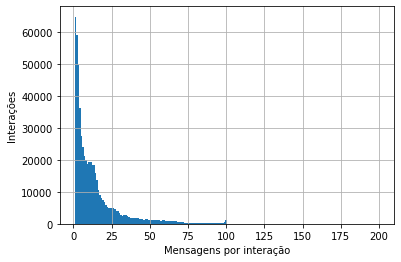

In [47]:
import matplotlib.pyplot as plt
plot = allmsg['messages'].loc[allmsg['attackerType'] != 0].hist(bins=200)
plot.set_xlabel("Mensagens por interação")
plot.set_ylabel("Interações")
plt.savefig('histtotal.pdf')

1 64686
2 59017
3 49744
4 36027
5 27567
6 23848
7 21111
8 20040
9 18712
10 19287
11 19231
12 18368
13 18218
14 15870
15 13620


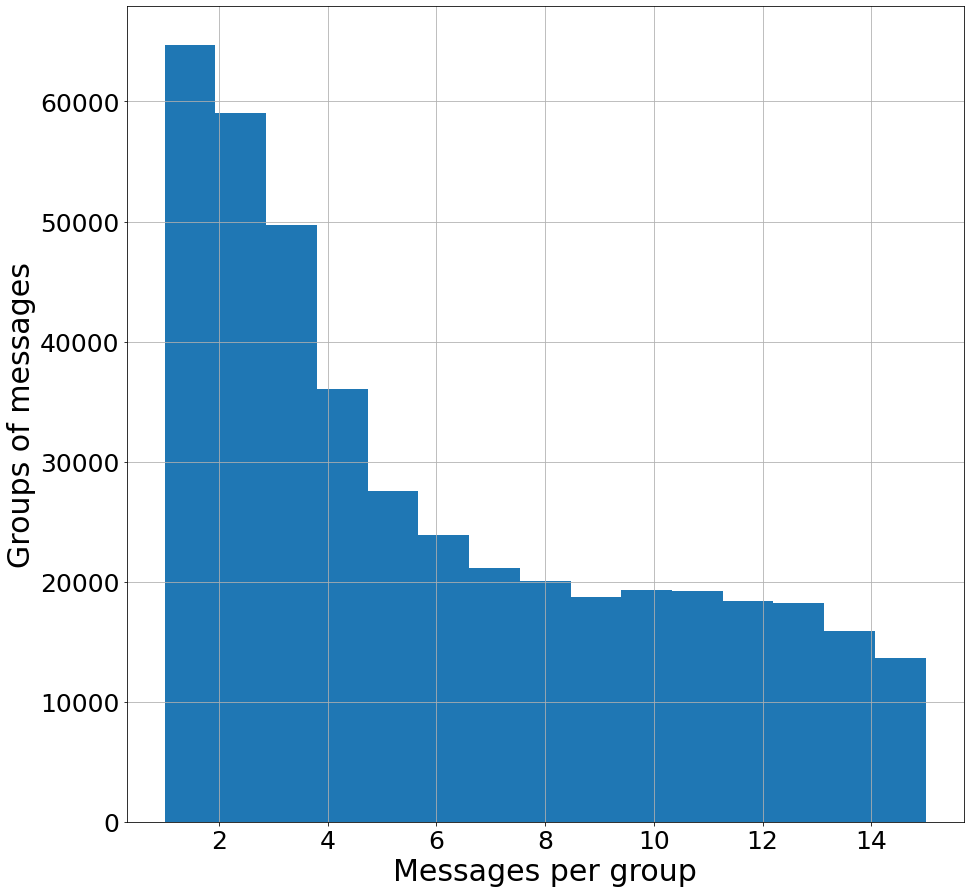

In [44]:

plot = allmsg['messages'].loc[allmsg['attackerType'] != 0].loc[allmsg['messages'] < 16].hist(bins=15, figsize=(15,15), ylabelsize=25, xlabelsize=25)
plot.set_xlabel("Messages per group", size=30)
plot.set_ylabel("Groups of messages", size=30)
for i in range(1, 16):
  print(i, len(allmsg['messages'].loc[allmsg['attackerType'] != 0].loc[allmsg['messages'] == i]))

In [ ]:
totalgroups = allmsg['messages'].count()
window3 = allmsg['messages'].loc[allmsg['messages'] >= 3].count()
window4 = allmsg['messages'].loc[allmsg['messages'] >= 4].count()
window5 = allmsg['messages'].loc[allmsg['messages'] >= 5].count()
window6 = allmsg['messages'].loc[allmsg['messages'] >= 6].count()
window7 = allmsg['messages'].loc[allmsg['messages'] >= 7].count()
print('total =', totalgroups)
print('window3 =', window3, '|', f"{(100*window3/totalgroups):.2f}", '%')
print('window4 =', window4, '|', f"{(100*window4/totalgroups):.2f}", '%')
print('window5 =', window5, '|', f"{(100*window5/totalgroups):.2f}", '%')
print('window6 =', window6, '|', f"{(100*window6/totalgroups):.2f}", '%')
print('window7 =', window7, '|', f"{(100*window7/totalgroups):.2f}", '%')

total = 2900722
window3 = 2290037 | 78.95 %
window4 = 2042929 | 70.43 %
window5 = 1866464 | 64.34 %
window6 = 1730263 | 59.65 %
window7 = 1615589 | 55.70 %
